In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Conv2D , Flatten , MaxPooling2D
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

In [27]:
train_data=np.array(train,dtype='float32')
test_data=np.array(test,dtype='float32')

In [58]:
X_train=train_data[:,1:]
y_train=train_data[:,0]
X_test=test_data[:,1:]
y_test=test_data[:,0]

In [59]:
X_train=X_train/255
X_test=X_test/255

In [60]:
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

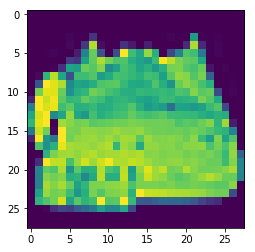

In [61]:
plt.imshow(X_train[100,:].reshape(28,28))
plt.show()

In [62]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [63]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [64]:
y_train.shape

(60000,)

In [66]:
model = Sequential()
model.add(Conv2D(64, (5,5),input_shape=X_train.shape[1:],padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=52,epochs=10,validation_split=0.1)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================]54000/54000 [==============================] - 1184s 22ms/step - loss: 0.4175 - acc: 0.8499 - val_loss: 0.3171 - val_acc: 0.8865

Epoch 2/10
54000/54000 [==============================]54000/54000 [==============================] - 1150s 21ms/step - loss: 0.2817 - acc: 0.8984 - val_loss: 0.2705 - val_acc: 0.9033

Epoch 3/10
54000/54000 [==============================]54000/54000 [==============================] - 1221s 23ms/step - loss: 0.2417 - acc: 0.9131 - val_loss: 0.2545 - val_acc: 0.9063

Epoch 4/10
54000/54000 [==============================]54000/54000 [==============================] - 1139s 21ms/step - loss: 0.2113 - acc: 0.9233 - val_loss: 0.2624 - val_acc: 0.9053

Epoch 5/10
54000/54000 [==============================]54000/54000 [==============================] - 1198s 22ms/step - loss: 0.1911 - acc

In [70]:
score=model.evaluate(X_test,y_test,verbose=0)

print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.2575166005462408
test accuracy: 0.9143
